<a href="https://colab.research.google.com/github/SerhiiAndreiko/HW_DATA_03/blob/main/Hw_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнє завдання**
Дане домашнє завдання буде повністю пов'язане з лінійною регресією та її реалізацією.
Отож розіб'ємо наше домашнє завдання на декілька частин:

напишіть функцію гіпотези лінійної регресії у векторному вигляді;
створіть функцію для обчислення функції втрат у векторному вигляді;
реалізуйте один крок градієнтного спуску;
знайдіть найкращі параметри $\vec{w}$ для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;
знайдіть ці ж параметри за допомогою аналітичного рішення;
порівняйте отримані результати.
В даному завданні вам не потрібно використовувати Стандартизацію, або Нормалізацію даних.

Дз повинно бути виконано у Jupyter Nootebook,(або Google Colab) і задеплоїне на Гітхаб у вигляді файлу .ipynb.

In [11]:

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib as mpl

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

df_main = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing.csv')

print(df_main.head())

Mounted at /content/drive
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [12]:

#Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
missing_values = df_main.isnull().sum()
total_rows = len(df_main)
missing_percentage = (missing_values / total_rows) * 100
print("Кількість пропусків в кожній колонці:")
missing_values

Кількість пропусків в кожній колонці:


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [13]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Створюємо "ящик з вусами"(box plot)  для кожного числового стовпця в DataFrame df_main за допомогою бібліотеки Seaborn.

<Axes: >

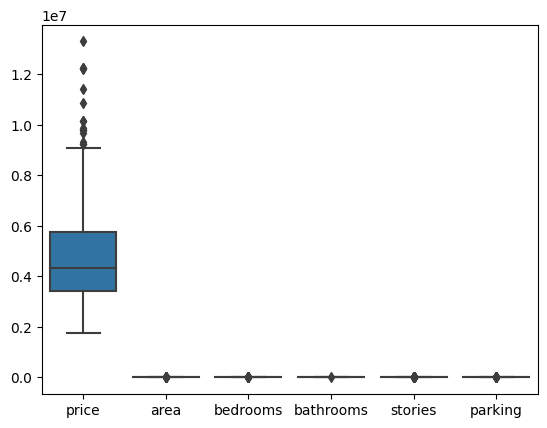

In [14]:
sns.boxplot(data=df_main)

In [18]:
print(df_main.describe().round(2))

print(df_main.shape)


             price      area  bedrooms  bathrooms  stories  parking
count       545.00    545.00    545.00     545.00   545.00   545.00
mean    4766729.25   5150.54      2.97       1.29     1.81     0.69
std     1870439.62   2170.14      0.74       0.50     0.87     0.86
min     1750000.00   1650.00      1.00       1.00     1.00     0.00
25%     3430000.00   3600.00      2.00       1.00     1.00     0.00
50%     4340000.00   4600.00      3.00       1.00     2.00     0.00
75%     5740000.00   6360.00      3.00       2.00     2.00     1.00
max    13300000.00  16200.00      6.00       4.00     4.00     3.00
(545, 13)


**Створюємо Матрицю кореляцій**

In [19]:
df_corr=df_main.corr().round(2)
df_corr

<ipython-input-19-734016024f6c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr=df_main.corr().round(2)


,price,area,bedrooms,bathrooms,stories,parking
price,1.00,0.54,0.37,0.52,0.42,0.38
area,0.54,1.00,0.15,0.19,0.08,0.35
bedrooms,0.37,0.15,1.00,0.37,0.41,0.14
bathrooms,0.52,0.19,0.37,1.00,0.33,0.18
stories,0.42,0.08,0.41,0.33,1.00,0.05
parking,0.38,0.35,0.14,0.18,0.05,1.00


from matplotlib import pyplot as plt
df_corr['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_corr['area'].plot(kind='hist', bins=20, title='area')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_corr['bedrooms'].plot(kind='hist', bins=20, title='bedrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_corr['bathrooms'].plot(kind='hist', bins=20, title='bathrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_corr.plot(kind='scatter', x='price', y='area', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_corr.plot(kind='scatter', x='area', y='bedrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_corr.plot(kind='scatter', x='bedrooms', y='bathrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_corr.plot(kind='scatter', x='bathrooms', y='stories', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_corr['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_corr['area'].plot(kind='line', figsize=(8, 4), title='area')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_corr['bedrooms'].plot(kind='line', figsize=(8, 4), title='bedrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_corr['bathrooms'].plot(kind='line', figsize=(8, 4), title='bathrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

In [20]:
import scipy.stats as st
np.round(st.pearsonr(df_main['price'], df_main['area'])[0], 2)

0.54

Text(0.5, 1.0, 'Prices of housing depending on the total area of the building correlation coefficient 0.54')

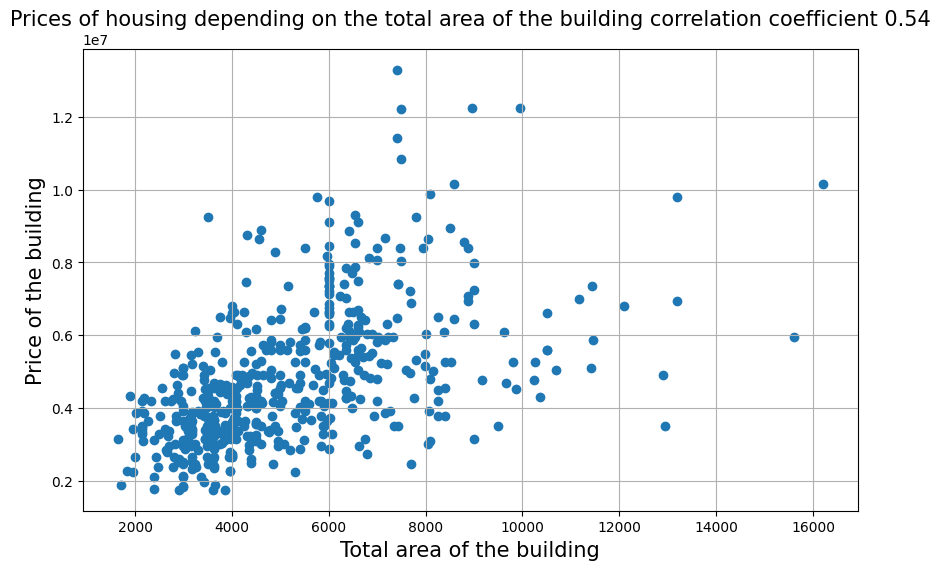

In [22]:
x1 = df_main['area']
x2 = df_main['bathrooms']
y = df_main['price']

plt.figure(figsize=(10,6))
plt.scatter(x1, y)
plt.grid(1)
plt.xlabel('Total area of the building', fontsize=15)
plt.ylabel('Price of the building', fontsize=15)
plt.title(f'Prices of housing depending on the total area of the building correlation coefficient {df_corr.price.area}', fontsize=15)


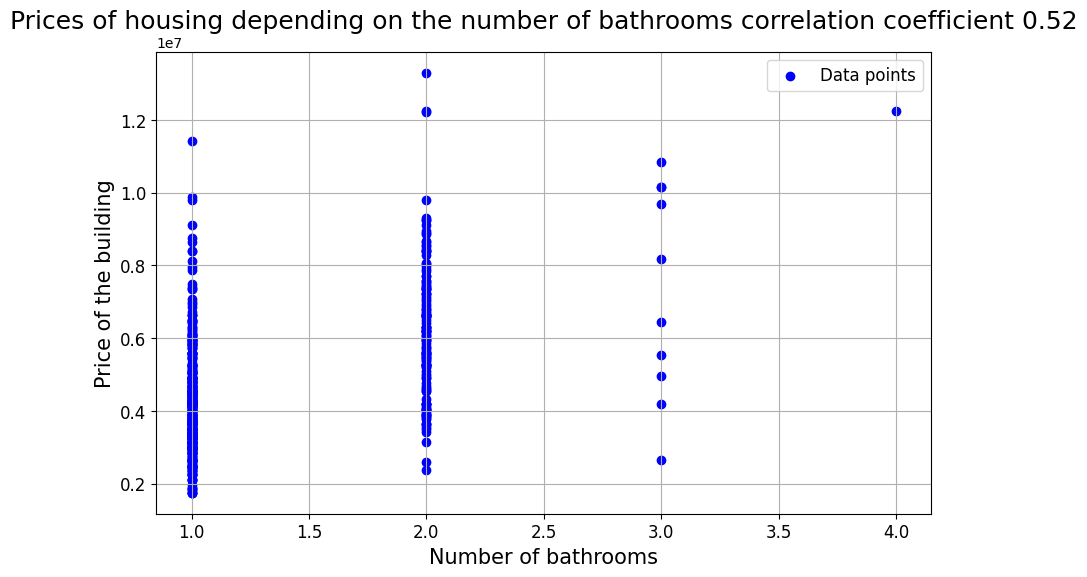

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(x2, y, color='blue', label='Data points')
plt.grid(True)
plt.xlabel('Number of bathrooms', fontsize=15)
plt.ylabel('Price of the building', fontsize=15)
plt.title(f'Prices of housing depending on the number of bathrooms correlation coefficient {df_corr.price.bathrooms}', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()


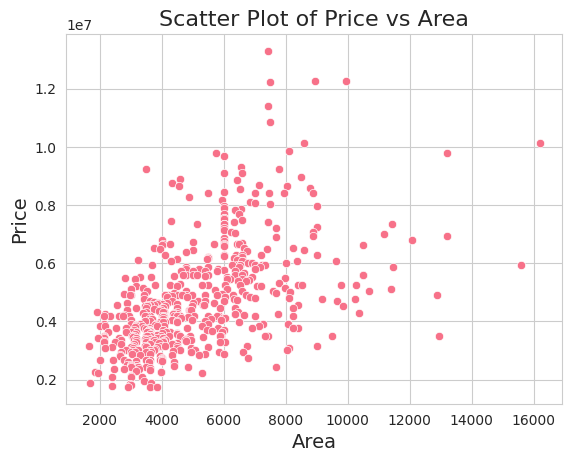

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_palette("husl")
sns.scatterplot(x='area', y='price', data=df_main)

plt.title('Scatter Plot of Price vs Area', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.show()

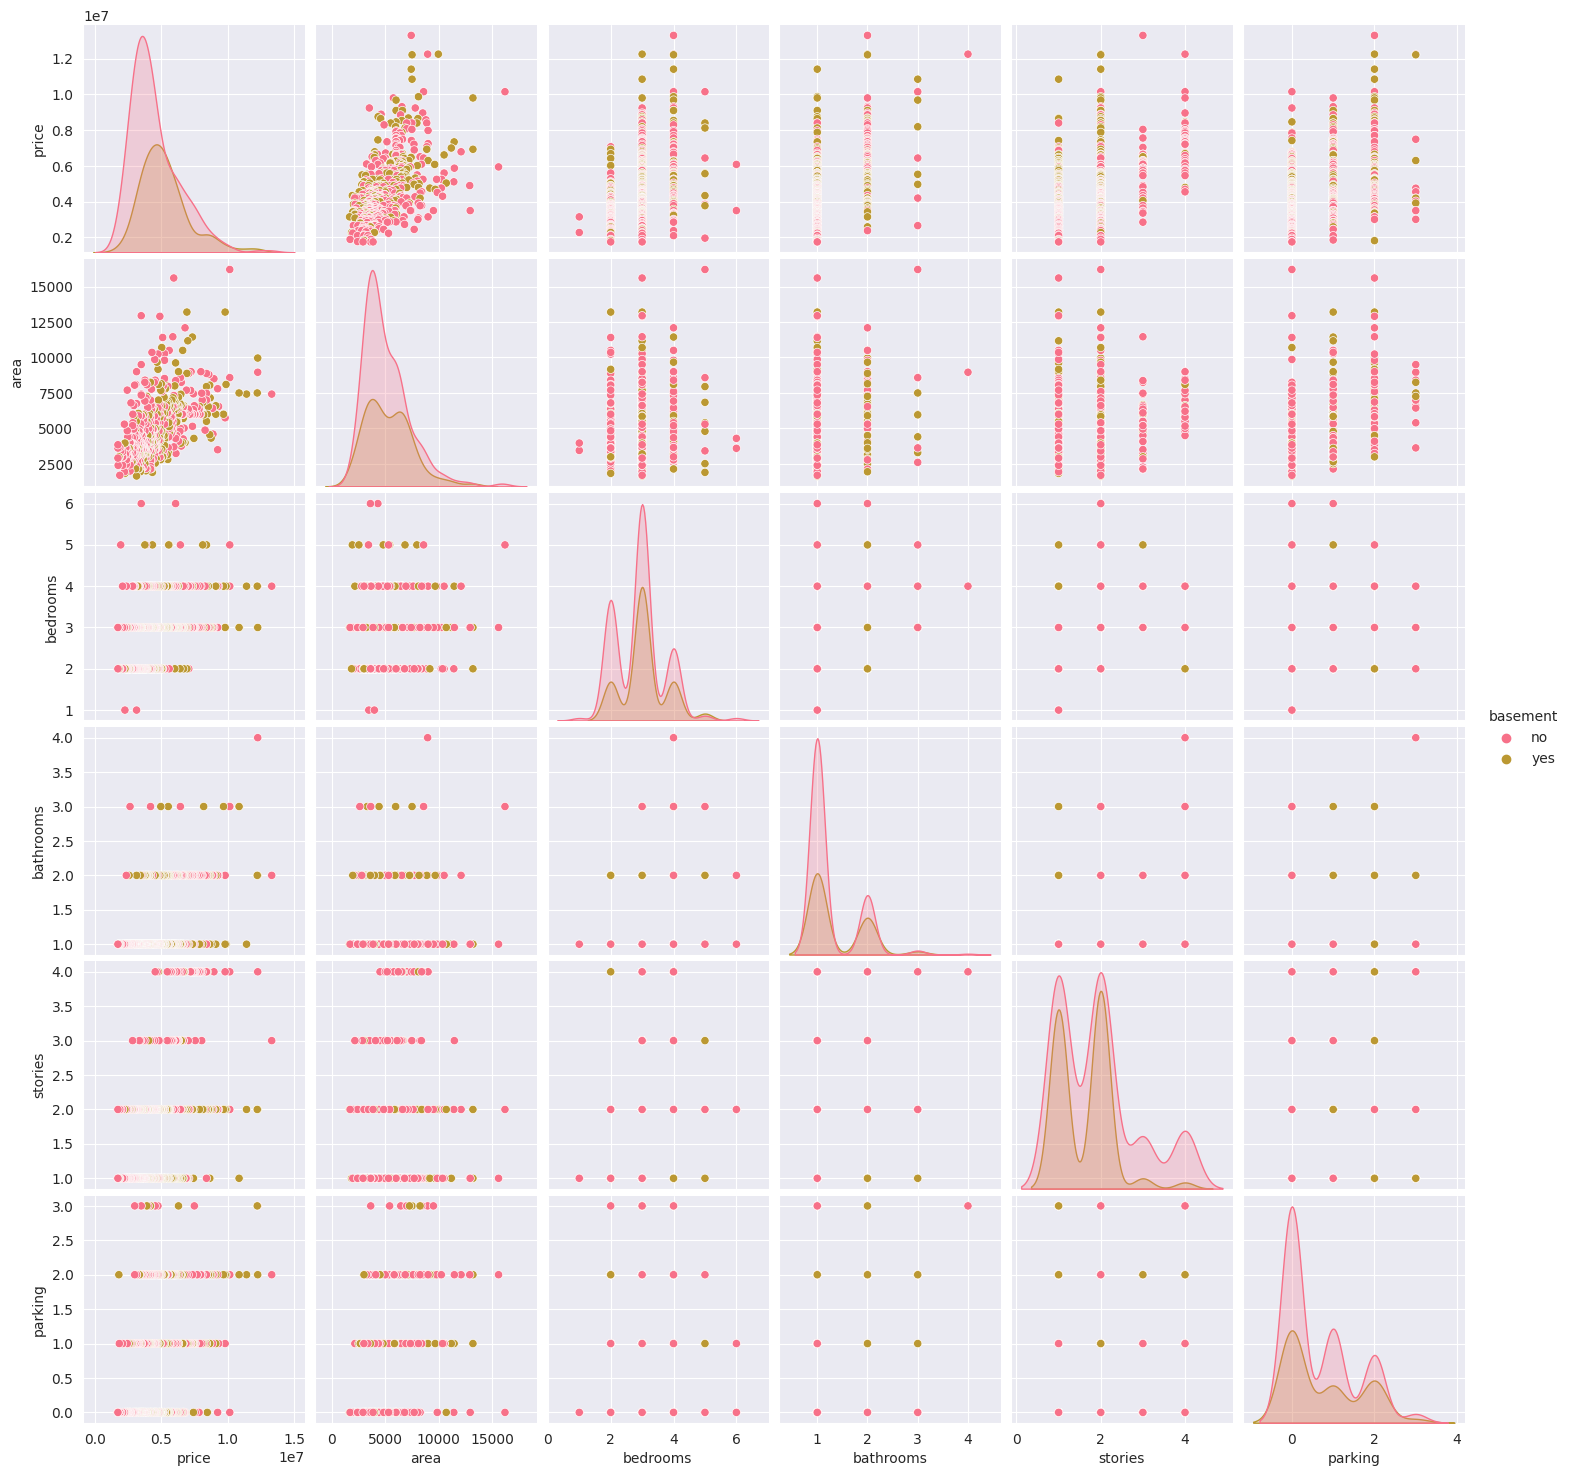

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
sns.set_palette("husl")

sns.pairplot(df_main, vars=['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], hue='basement')

plt.show()


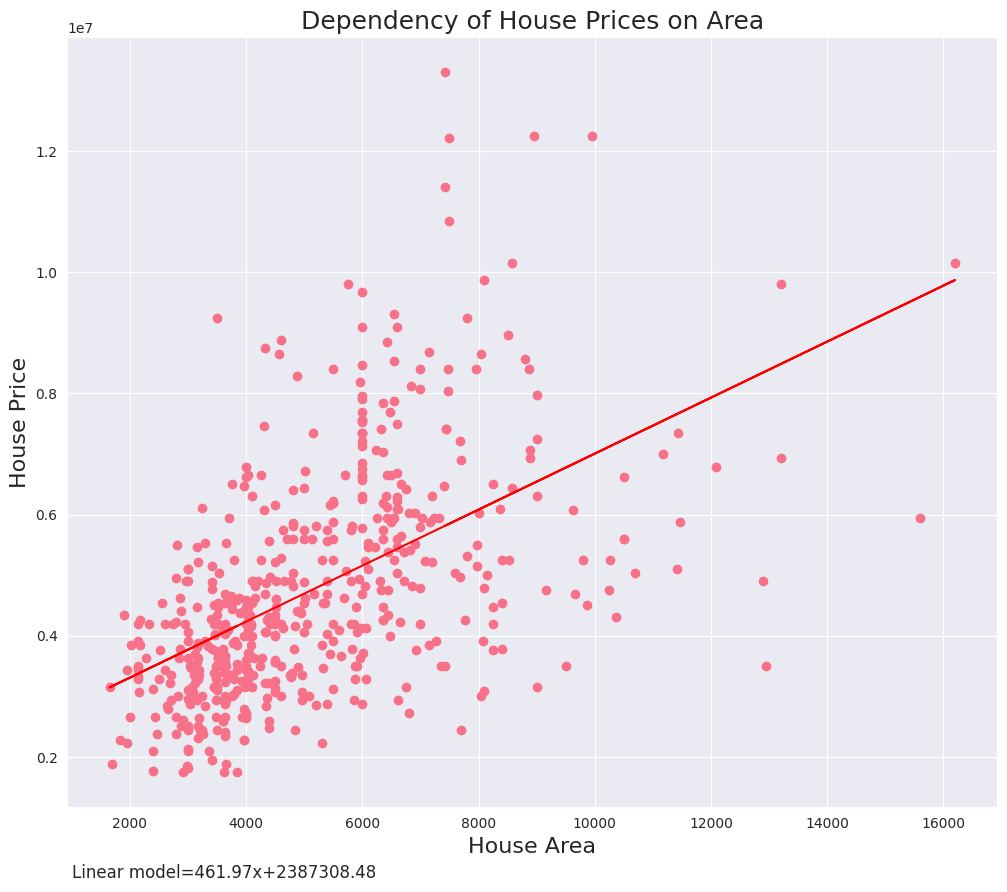

In [28]:
import seaborn as sns

sns.set_palette("husl")

X = x1
y = y

plt.figure(figsize=(12,10))

plt.scatter(X, y)
# Linear Regression
slope, intercept = np.polyfit(X, y, 1)

plt.plot(X, X * slope + intercept, 'r')

plt.text(1000, 5000, f'Linear model={slope:.2f}x+{intercept:.2f}', fontsize=12)
plt.xlabel('House Area', fontsize=16)
plt.ylabel('House Price', fontsize=16)
plt.title('Dependency of House Prices on Area', fontsize=18)
plt.show()


Predicted price for a house with area 10000 sqft: 7007057.43
Intercept from scikit-learn: 2387308.48239643
Coefficients from scikit-learn: [461.97489427]
Intercept from scikit-learn: -173171.60763263796
Coefficients from scikit-learn: [3.78762754e+02 1.38604950e+06 4.06820034e+05]


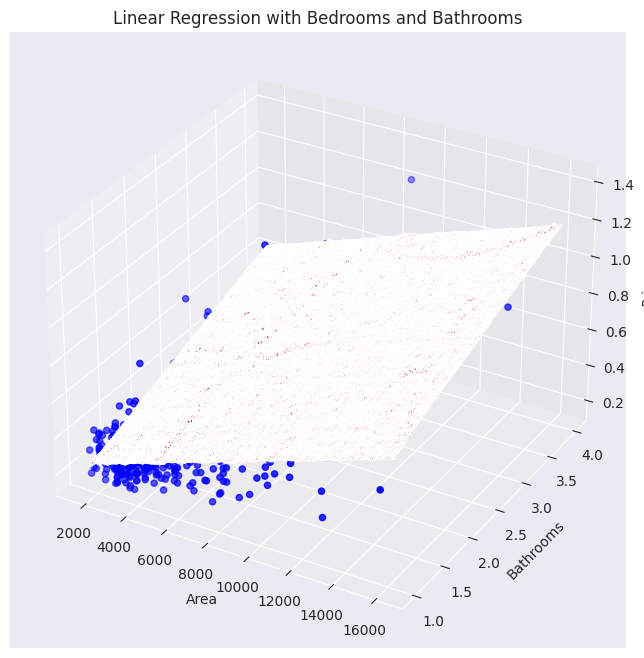

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Given data
new_area = 10000
slope = 461.97489427
intercept = 2387308.48239643

# Predicting house price for new_area
predicted_price = np.round(slope * new_area + intercept, 2)
print("Predicted price for a house with area 10000 sqft:", predicted_price)

# Data preparation for single-variable linear regression
features = ['area']
target = 'price'
X = df_main[features].values.reshape(-1, 1)
y = df_main[target].values

# Model training for single-variable linear regression
model = LinearRegression()
model.fit(X, y)

# Printing coefficients from scikit-learn
print(f'Intercept from scikit-learn: {model.intercept_}')
print(f'Coefficients from scikit-learn: {model.coef_}')

# Data preparation for multi-variable linear regression
features = ['area', 'bathrooms', 'bedrooms']
target = 'price'
X3 = df_main[features]
y3 = df_main[target]

# Model training for multi-variable linear regression
model1 = LinearRegression()
model1.fit(X3, y3)

# Printing coefficients from scikit-learn for multi-variable linear regression
print(f'Intercept from scikit-learn: {model1.intercept_}')
print(f'Coefficients from scikit-learn: {model1.coef_}')

# 3D plot for multi-variable linear regression
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Creating grid
x_values = np.linspace(min(X3['area']), max(X3['area']), 100)
bathrooms_values = np.linspace(min(df_main['bathrooms']), max(df_main['bathrooms']), 100)
bedrooms_values = np.linspace(min(df_main['bedrooms']), max(df_main['bedrooms']), 100)
x, bathrooms, bedrooms = np.meshgrid(x_values, bathrooms_values, bedrooms_values)

# Predicting prices for the grid points
y_values = model1.intercept_ + model1.coef_[0] * x + model1.coef_[1] * bathrooms + model1.coef_[2] * bedrooms

# Plotting
ax.scatter(X[:, 0], X3['bathrooms'], y, color='blue', label='Actual data')
ax.plot_trisurf(x.flatten(), bathrooms.flatten(), y_values.flatten(), color='red', alpha=0.5)
ax.set_xlabel('Area')
ax.set_ylabel('Bathrooms')
ax.set_zlabel('Price')
ax.set_title('Linear Regression with Bedrooms and Bathrooms')
plt.show()



In [40]:
X_1 = X[:, 0]  # Отримання значень стовпця 'area' з масиву X
y_1 = y


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Given data
new_area = 10000
slope = 461.97489427
intercept = 2387308.48239643

# Predicting house price for new_area
predicted_price = np.round(slope * new_area + intercept, 2)
print("Predicted price for a house with area 10000 sqft:", predicted_price)

# Data preparation for single-variable linear regression
features = ['area']
target = 'price'
X = df_main[features].values.reshape(-1, 1)
y = df_main[target].values

# Model training for single-variable linear regression
model = LinearRegression()
model.fit(X, y)

# Printing coefficients from scikit-learn
print(f'Intercept from scikit-learn: {model.intercept_}')
print(f'Coefficients from scikit-learn: {model.coef_}')

# Data preparation for multi-variable linear regression
features = ['area', 'bathrooms', 'bedrooms']
target = 'price'
X3 = df_main[features]
y3 = df_main[target]

# Model training for multi-variable linear regression
model1 = LinearRegression()
model1.fit(X3, y3)

# Printing coefficients from scikit-learn for multi-variable linear regression
print(f'Intercept from scikit-learn: {model1.intercept_}')
print(f'Coefficients from scikit-learn: {model1.coef_}')

# 3D plot for multi-variable linear regression
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Creating grid
x_values = np.linspace(min(X3['area']), max(X3['area']), 100)
bathrooms_values = np.linspace(min(df_main['bathrooms']), max(df_main['bathrooms']), 100)
bedrooms_values = np.linspace(min(df_main['bedrooms']), max(df_main['bedrooms']), 100)
x, bathrooms, bedrooms = np.meshgrid(x_values, bathrooms_values, bedrooms_values)

# Predicting prices for the grid points
y_values = model1.intercept_ + model1.coef_[0] * x + model1.coef_[1] * bathrooms + model1.coef_[2] * bedrooms

# Plotting
ax.scatter(X['area'], X3['bathrooms'], y, color='blue', label='Actual data')
ax.plot_trisurf(x.flatten(), bathrooms.flatten(), y_values.flatten(), color='red', alpha=0.5)
ax.set_xlabel('Area')
ax.set_ylabel('Bathrooms')
ax.set_zlabel('Price')
ax.set_title('Linear Regression with Bedrooms and Bathrooms')
plt.show()


In [41]:
y_1.shape

(545,)

In [43]:
# Adding X0=1
X2 = np.hstack((np.ones((X.shape[0], 1)), X))
# Least squares method
w = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y_1)

print(f'Intercept: {w[0]}')
print(f'Coefficient: {w[1:]}')

Intercept: 2387308.4823964285
Coefficient: [461.97489427]


In [51]:
def hypothesis(w, X):
    """
    w: vector of regression parameters (w0, w1, w2, ...)
    X: feature matrix with dimensions (m, n), where m - number of examples, n - number of features
    Returns the predicted target values based on the linear regression model
    """
    return np.dot(X, w)


In [50]:
weights = gradient_descent_step((0., 0.), X2 , y_1, learning_rate=0.0001)
print(weights)

[4.76672925e+02 2.67229201e+06]


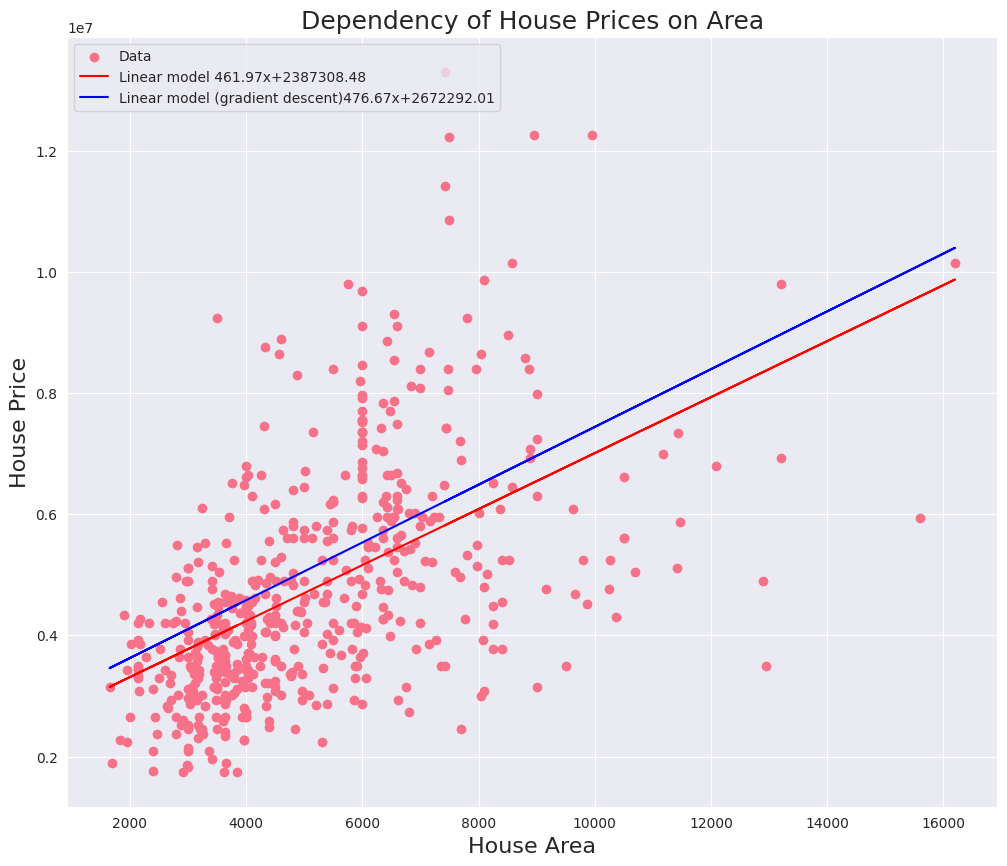

In [52]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(12, 10))

plt.scatter(X, y, label='Data')

plt.plot(X, X * slope + intercept, 'r', label=f'Linear model {slope:.2f}x+{intercept:.2f}')
plt.plot(X, X * weights[0] + weights[1], 'b', label=f'Linear model (gradient descent){weights[0]:.2f}x+{weights[1]:.2f}')



plt.legend(loc='upper left')
plt.xlabel('House Area', fontsize=16)
plt.ylabel('House Price', fontsize=16)
plt.title('Dependency of House Prices on Area', fontsize=18)

plt.show()

In [53]:

X_area = df_main.area
X_bedrooms = df_main.bedrooms
X_bathrooms= df_main.bathrooms
X_parking= df_main.parking
y_ml = df_main.price
model = LinearRegression()
X33 = np.column_stack((X_area, X_bedrooms, X_bathrooms, X_parking))
result=model.fit(X33, y_ml)

house_area = 5000
house_bedrooms = 4
house_bathrooms=2
house_parking= 3
predicted_price = model.predict(np.array([[house_area, house_bedrooms, house_bathrooms, house_parking]]))
print(f'Predicted price for a house with area {house_area} sq. meters, {house_bedrooms} bedrooms, {house_bathrooms} bathrooms, and {house_parking} parking spaces: ${predicted_price[0]:.2f}')



Predicted price for a house with area 5000 sq. meters, 4 bedrooms, 2 bathrooms, and 3 parking spaces: $6882190.06


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


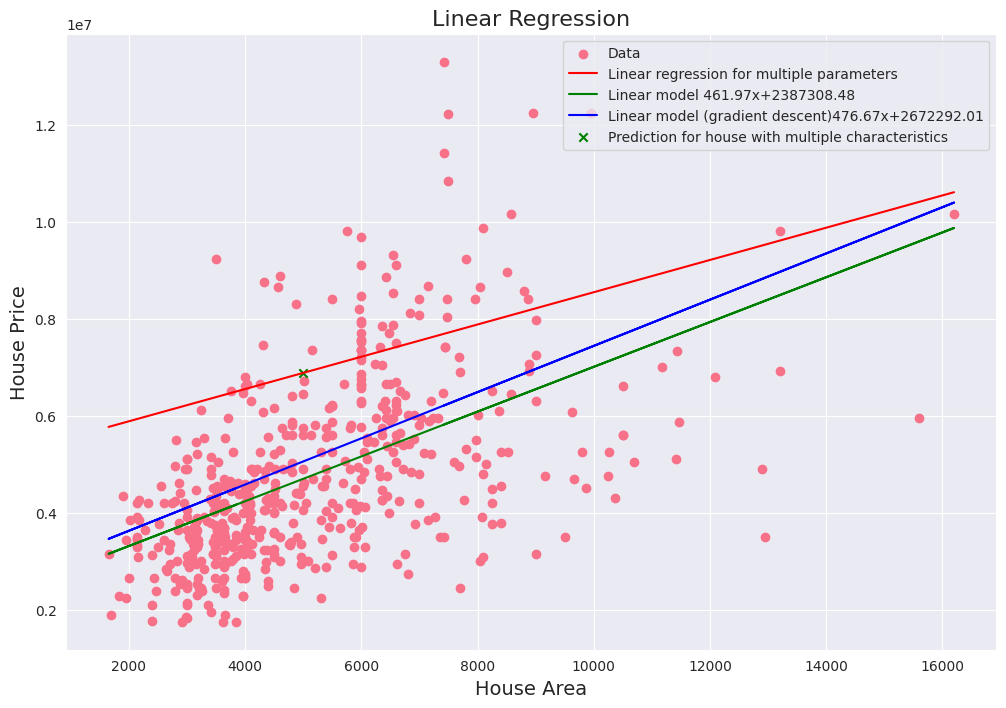

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X_features = df_main[['area', 'bedrooms', 'bathrooms', 'parking']]
y_target = df_main['price']

# Training the linear regression model
model = LinearRegression()
model.fit(X_features, y_target)

# Setting parameters for a sample house
house_area = 5000
house_bedrooms = 4
house_bathrooms = 2
house_parking = 3

# Generating new feature values for prediction
x_values = np.linspace(X_features['area'].min(), X_features['area'].max(), 100).reshape(-1, 1)
X_new = np.column_stack((x_values, np.full_like(x_values, house_bedrooms),
                         np.full_like(x_values, house_bathrooms),
                         np.full_like(x_values, house_parking)))

# Predicting house prices
y_pred = model.predict(X_new)

# Plotting
plt.figure(figsize=(12, 8))

# Plotting the data and linear regression line
plt.scatter(X_features['area'], y_target, label='Data')
plt.plot(x_values, y_pred, 'r', label='Linear regression for multiple parameters')

# Plotting other linear models if available
if 'slope' in locals() and 'intercept' in locals():
    plt.plot(X_features['area'], X_features['area'] * slope + intercept, 'g', label=f'Linear model {slope:.2f}x+{intercept:.2f}')
if 'weights' in locals():
    plt.plot(X_features['area'], X_features['area'] * weights[0] + weights[1], 'b', label=f'Linear model (gradient descent){weights[0]:.2f}x+{weights[1]:.2f}')

# Plotting prediction for a sample house
plt.scatter([house_area], model.predict([[house_area, house_bedrooms, house_bathrooms, house_parking]]), color='green', marker='x', label='Prediction for house with multiple characteristics')

# Customizing plot
plt.legend()
plt.xlabel('House Area', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.title('Linear Regression', fontsize=16)

plt.show()
